In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
pd.option_context('display.max_rows', None, 'display.max_columns', None)

In [189]:
excel_path = '/content/drive/My Drive/CS466/Project/Result/Dataset-2.1/Dataset-2.1.xlsx'
image_path = '/content/drive/My Drive/CS466/Project/Result/Dataset-2.1/Plot'
log_path = '/content/drive/My Drive/CS466/Project/Result/Dataset-2.1/Plot/log.txt'
if (os.path.exists(log_path)):
    os.remove(log_path) 

In [190]:
if not (os.path.exists(image_path)):
    os.mkdir(image_path)

In [191]:
def box_plot(df, x_col, y_col, xlabel, ylabel):
    df = df[[x_col, y_col]]
    #print(df)
    gb = df.groupby(x_col)

    log_file = open(log_path, 'a')

    print('Mean', file=log_file)
    print(gb.mean().reset_index(), file=log_file)
    print('Median', file=log_file)
    print(gb.median().reset_index(), file=log_file)
    print('Std', file=log_file)
    print(gb.std().reset_index(), file=log_file)
    #print(gb.mean().reset_index())

    log_file.flush()
    log_file.close()

    labels = []
    values = []
    for name, group in gb:
        labels.append(name)
        values.append(group[y_col])
    
    fig, ax = plt.subplots()
    box = ax.boxplot(values)
    plt.xticks([1, 2, 3], labels)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.savefig(image_path + '/' + x_col + ':' + y_col + '.png')
    #plt.show()

In [192]:
def scatter_plot(df):
    df = df.rename(columns={'ICPC': 'Original_ICPC'})
    df['Predicted_ICPC'] = df['info_cont'] / df['ML']

    df = df[['Original_ICPC', 'Predicted_ICPC']]

    gb = df.groupby('Original_ICPC')
    labels = []
    values = []
    for name, group in gb:
        labels.append(name)
        values.append(group['Predicted_ICPC'])

    fig, ax = plt.subplots()
    box = ax.boxplot(values)
    plt.xticks([1, 2, 3], labels)
    
    plt.xlabel('Original_ICPC')
    plt.ylabel('Predicted_ICPC')
    plt.savefig(image_path + '/icpc_scatter.png')
    #plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


"\nprint(df)\n\ndefault_ICPC = 2\ndefault_ML = 8\ndefault_SC = 10\n\n# ICPC \n\nicpc_df = df[(df['ML'] == default_ML) &  (df['SC'] == default_SC)]\nprint(icpc_df.shape)\n\nbox_plot(icpc_df, x_col='ICPC', y_col='overlap', xlabel='ICPC', ylabel='Site Overlap')\nbox_plot(icpc_df, x_col='ICPC', y_col='runtime', xlabel='ICPC', ylabel='Running Time')\nbox_plot(icpc_df, x_col='ICPC', y_col='entropy', xlabel='ICPC', ylabel='Relative Entropy')\n\n# SC\nsc_df = df[(df['ICPC'] == default_ICPC) &  (df['ML'] == default_ML)]\nprint(sc_df.shape)\n\nbox_plot(sc_df, x_col='SC', y_col='overlap', xlabel='Sequence Count', ylabel='Site Overlap')\nbox_plot(sc_df, x_col='SC', y_col='runtime', xlabel='Sequence Count', ylabel='Running Time')\nbox_plot(sc_df, x_col='SC', y_col='entropy', xlabel='Sequence Count', ylabel='Relative Entropy')\n\n# ML\nml_df = df[(df['ICPC'] == default_ICPC) &  (df['SC'] == default_SC)]\nprint(ml_df.shape)\n\nbox_plot(ml_df, x_col='ML', y_col='overlap', xlabel='Motif Length', ylabel

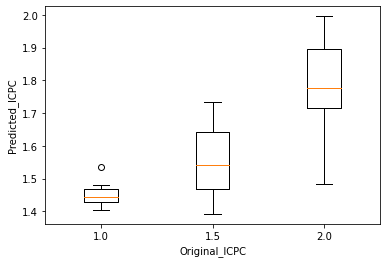

In [193]:
df = pd.read_excel(excel_path, sheet_name='Metrics')
scatter_plot(df)
'''
print(df)

default_ICPC = 2
default_ML = 8
default_SC = 10

# ICPC 

icpc_df = df[(df['ML'] == default_ML) &  (df['SC'] == default_SC)]
print(icpc_df.shape)

box_plot(icpc_df, x_col='ICPC', y_col='overlap', xlabel='ICPC', ylabel='Site Overlap')
box_plot(icpc_df, x_col='ICPC', y_col='runtime', xlabel='ICPC', ylabel='Running Time')
box_plot(icpc_df, x_col='ICPC', y_col='entropy', xlabel='ICPC', ylabel='Relative Entropy')

# SC
sc_df = df[(df['ICPC'] == default_ICPC) &  (df['ML'] == default_ML)]
print(sc_df.shape)

box_plot(sc_df, x_col='SC', y_col='overlap', xlabel='Sequence Count', ylabel='Site Overlap')
box_plot(sc_df, x_col='SC', y_col='runtime', xlabel='Sequence Count', ylabel='Running Time')
box_plot(sc_df, x_col='SC', y_col='entropy', xlabel='Sequence Count', ylabel='Relative Entropy')

# ML
ml_df = df[(df['ICPC'] == default_ICPC) &  (df['SC'] == default_SC)]
print(ml_df.shape)

box_plot(ml_df, x_col='ML', y_col='overlap', xlabel='Motif Length', ylabel='Site Overlap')
box_plot(ml_df, x_col='ML', y_col='runtime', xlabel='Motif Length', ylabel='Running Time')
box_plot(ml_df, x_col='ML', y_col='entropy', xlabel='Motif Length', ylabel='Relative Entropy')'''